In [1]:
from keras import layers
from keras import models
import tensorflow as tf
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
from keras_preprocessing.image import ImageDataGenerator

In [2]:
#check GPU enabled
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [16]:
#image data loader
datagen=ImageDataGenerator(rescale=1./255.)
train_generator=datagen.flow_from_directory(
    directory="E:\\CS224S_final_Project\\data\\train_images",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(469, 306))

valid_generator=datagen.flow_from_directory(
    directory="E:\\CS224S_final_Project\\data\\dev_images",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(469,306))

test_generator=datagen.flow_from_directory(
    directory="E:\\CS224S_final_Project\\data\\test_images",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(469,306))

Found 3037 images belonging to 2 classes.
Found 1154 images belonging to 2 classes.
Found 1578 images belonging to 2 classes.


In [17]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(469,306,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 469, 306, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 469, 306, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 467, 304, 64)      18496     
_________________________________________________________________
activation_17 (Activation)   (None, 467, 304, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 233, 152, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 233, 152, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 233, 152, 64)     

In [18]:
#Fitting keras model, no test gen for now
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30)
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

Epoch 1/30
94/94 [==============================] - 41s 430ms/step - loss: 1.1666 - accuracy: 0.6870 - val_loss: 0.6757 - val_accuracy: 0.5972
Epoch 2/30
94/94 [==============================] - 40s 429ms/step - loss: 0.6142 - accuracy: 0.7239 - val_loss: 0.6809 - val_accuracy: 0.5972
Epoch 3/30
94/94 [==============================] - 40s 427ms/step - loss: 0.6132 - accuracy: 0.7207 - val_loss: 0.6751 - val_accuracy: 0.5981
Epoch 4/30
94/94 [==============================] - 41s 433ms/step - loss: 0.5911 - accuracy: 0.7178 - val_loss: 0.6769 - val_accuracy: 0.5990
Epoch 5/30
94/94 [==============================] - 40s 426ms/step - loss: 0.5901 - accuracy: 0.7059 - val_loss: 0.6744 - val_accuracy: 0.5990
Epoch 6/30
94/94 [==============================] - 40s 426ms/step - loss: 0.5600 - accuracy: 0.7200 - val_loss: 0.7376 - val_accuracy: 0.5972
Epoch 7/30
94/94 [==============================] - 40s 426ms/step - loss: 0.5296 - accuracy: 0.7400 - val_loss: 0.6977 - val_accuracy: 0.5981

[2.446561574935913, 0.5972222089767456]

In [19]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

acc = model.evaluate_generator(generator=test_generator, steps=STEP_SIZE_TEST)
acc

49/49 [==============================] - 6s 120ms/step


[0.7442506551742554, 0.6033163070678711]

In [13]:
history.history

{'loss': [0.5970097184181213,
  0.5864580869674683,
  0.5733625292778015,
  0.5593507289886475,
  0.5499074459075928,
  0.529107928276062,
  0.5039184093475342,
  0.49000266194343567,
  0.4611984193325043,
  0.4361407458782196,
  0.4101009964942932,
  0.3861428201198578,
  0.3670750558376312,
  0.3522728979587555,
  0.3325035870075226,
  0.3121224343776703,
  0.2907268702983856,
  0.2930213212966919,
  0.2721068859100342,
  0.2542506158351898,
  0.2511141002178192,
  0.2314685732126236,
  0.22735288739204407,
  0.22089965641498566,
  0.20902900397777557,
  0.1775413602590561,
  0.18083719909191132,
  0.1746797114610672,
  0.17320701479911804,
  0.15977928042411804],
 'accuracy': [0.7194675803184509,
  0.7171381115913391,
  0.7174708843231201,
  0.720798671245575,
  0.728723406791687,
  0.7400998473167419,
  0.7527454495429993,
  0.7650582194328308,
  0.7763727307319641,
  0.7946755290031433,
  0.8053244352340698,
  0.8282861709594727,
  0.8296173214912415,
  0.841930091381073,
  0.8552

In [14]:
output = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

In [21]:
history.history['val_accuracy']

[0.5980902910232544,
 0.5980902910232544,
 0.5972222089767456,
 0.5963541865348816,
 0.5642361044883728,
 0.5078125,
 0.484375,
 0.5295138955116272,
 0.5251736044883728,
 0.4869791567325592,
 0.5130208134651184,
 0.484375,
 0.5199652910232544,
 0.5138888955116272,
 0.4756944477558136,
 0.4600694477558136,
 0.5269097089767456,
 0.4904513955116272,
 0.5182291865348816,
 0.4131944477558136,
 0.5199652910232544,
 0.4756944477558136,
 0.4600694477558136,
 0.4921875,
 0.4505208432674408,
 0.5355902910232544,
 0.5486111044883728,
 0.5234375,
 0.4635416567325592,
 0.4609375]

In [18]:
output

[1.459011435508728, 0.4618055522441864]

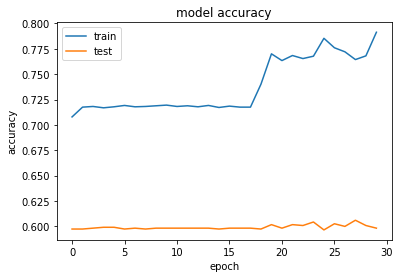

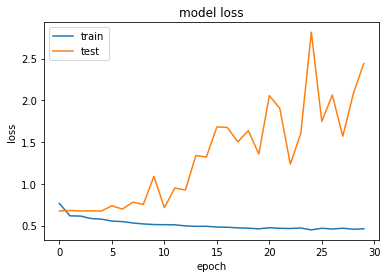

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
history.history

{'loss': [0.5970097184181213,
  0.5864580869674683,
  0.5733625292778015,
  0.5593507289886475,
  0.5499074459075928,
  0.529107928276062,
  0.5039184093475342,
  0.49000266194343567,
  0.4611984193325043,
  0.4361407458782196,
  0.4101009964942932,
  0.3861428201198578,
  0.3670750558376312,
  0.3522728979587555,
  0.3325035870075226,
  0.3121224343776703,
  0.2907268702983856,
  0.2930213212966919,
  0.2721068859100342,
  0.2542506158351898,
  0.2511141002178192,
  0.2314685732126236,
  0.22735288739204407,
  0.22089965641498566,
  0.20902900397777557,
  0.1775413602590561,
  0.18083719909191132,
  0.1746797114610672,
  0.17320701479911804,
  0.15977928042411804],
 'accuracy': [0.7194675803184509,
  0.7171381115913391,
  0.7174708843231201,
  0.720798671245575,
  0.728723406791687,
  0.7400998473167419,
  0.7527454495429993,
  0.7650582194328308,
  0.7763727307319641,
  0.7946755290031433,
  0.8053244352340698,
  0.8282861709594727,
  0.8296173214912415,
  0.841930091381073,
  0.8552